In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usd-inr-training/USD_INR.csv


In [2]:
df=pd.read_csv('/kaggle/input/usd-inr-training/USD_INR.csv')

In [3]:
df.head()

,Month,Weekday,Date,EUR,JPY,BGN,CZK,DKK,GBP,HUF,...,IDR,INR,KRW,MXN,MYR,NZD,PHP,SGD,THB,ZAR
0,9,4,27/09/23,1.0536,149.202733,1.856302,23.225133,7.077259,1.213685,370.966211,...,15551.85080,83.191439,1352.686029,17.618071,4.707954,0.592609,56.990319,1.371393,36.580296,19.192863
1,9,3,26/09/23,1.0605,148.863743,1.844224,23.018388,7.032060,1.218685,366.694955,...,15490.00471,83.262141,1348.533711,17.427251,4.689958,0.596390,57.007072,1.367280,36.349835,18.989816
2,9,2,25/09/23,1.0633,148.669237,1.839368,22.925797,7.013167,1.222676,367.798364,...,15381.45396,83.115772,1338.248848,17.236340,4.685037,0.596589,56.752563,1.365936,36.110223,18.753879
3,9,6,22/09/23,1.0647,148.276510,1.836949,22.879684,7.002630,1.226684,363.200902,...,15374.99765,82.931812,1332.985818,17.156006,4.687518,0.597039,56.757772,1.364610,35.960364,18.781816
4,9,5,21/09/23,1.0635,147.945463,1.839022,22.977903,7.009591,1.226460,364.626234,...,15374.99765,83.095252,1340.902680,17.151011,4.691490,0.590702,56.921486,1.368970,36.189939,18.948942


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3777 entries, 0 to 3776
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Month    3777 non-null   int64  
 1   Weekday  3777 non-null   int64  
 2   Date     3777 non-null   object 
 3   EUR      3777 non-null   float64
 4   JPY      3777 non-null   float64
 5   BGN      3777 non-null   float64
 6   CZK      3777 non-null   float64
 7   DKK      3777 non-null   float64
 8   GBP      3777 non-null   float64
 9   HUF      3777 non-null   float64
 10  PLN      3777 non-null   float64
 11  RON      3777 non-null   float64
 12  SEK      3777 non-null   float64
 13  CHF      3777 non-null   float64
 14  NOK      3777 non-null   float64
 15  TRY      3777 non-null   float64
 16  AUD      3777 non-null   float64
 17  BRL      3777 non-null   float64
 18  CAD      3777 non-null   float64
 19  CNY      3777 non-null   float64
 20  HKD      3777 non-null   float64
 21  IDR      3777 

In [5]:
df['date']=pd.to_datetime(df['Date'], format = '%d/%m/%y')

In [6]:
df['Year'] = df['date'].dt.year
df['Day'] = df['date'].dt.day

In [7]:
df.head()

,Month,Weekday,Date,EUR,JPY,BGN,CZK,DKK,GBP,HUF,...,MXN,MYR,NZD,PHP,SGD,THB,ZAR,date,Year,Day
0,9,4,27/09/23,1.0536,149.202733,1.856302,23.225133,7.077259,1.213685,370.966211,...,17.618071,4.707954,0.592609,56.990319,1.371393,36.580296,19.192863,2023-09-27,2023,27
1,9,3,26/09/23,1.0605,148.863743,1.844224,23.018388,7.032060,1.218685,366.694955,...,17.427251,4.689958,0.596390,57.007072,1.367280,36.349835,18.989816,2023-09-26,2023,26
2,9,2,25/09/23,1.0633,148.669237,1.839368,22.925797,7.013167,1.222676,367.798364,...,17.236340,4.685037,0.596589,56.752563,1.365936,36.110223,18.753879,2023-09-25,2023,25
3,9,6,22/09/23,1.0647,148.276510,1.836949,22.879684,7.002630,1.226684,363.200902,...,17.156006,4.687518,0.597039,56.757772,1.364610,35.960364,18.781816,2023-09-22,2023,22
4,9,5,21/09/23,1.0635,147.945463,1.839022,22.977903,7.009591,1.226460,364.626234,...,17.151011,4.691490,0.590702,56.921486,1.368970,36.189939,18.948942,2023-09-21,2023,21


In [8]:
df.dtypes

Month               int64
Weekday             int64
Date               object
EUR               float64
JPY               float64
BGN               float64
CZK               float64
DKK               float64
GBP               float64
HUF               float64
PLN               float64
RON               float64
SEK               float64
CHF               float64
NOK               float64
TRY               float64
AUD               float64
BRL               float64
CAD               float64
CNY               float64
HKD               float64
IDR               float64
INR               float64
KRW               float64
MXN               float64
MYR               float64
NZD               float64
PHP               float64
SGD               float64
THB               float64
ZAR               float64
date       datetime64[ns]
Year                int32
Day                 int32
dtype: object

In [9]:
X=df.drop(['Date','date','INR'],axis=1)
y=df['INR']

In [10]:
X.head()

,Month,Weekday,EUR,JPY,BGN,CZK,DKK,GBP,HUF,PLN,...,KRW,MXN,MYR,NZD,PHP,SGD,THB,ZAR,Year,Day
0,9,4,1.0536,149.202733,1.856302,23.225133,7.077259,1.213685,370.966211,4.389711,...,1352.686029,17.618071,4.707954,0.592609,56.990319,1.371393,36.580296,19.192863,2023,27
1,9,3,1.0605,148.863743,1.844224,23.018388,7.032060,1.218685,366.694955,4.346346,...,1348.533711,17.427251,4.689958,0.596390,57.007072,1.367280,36.349835,18.989816,2023,26
2,9,2,1.0633,148.669237,1.839368,22.925797,7.013167,1.222676,367.798364,4.316091,...,1338.248848,17.236340,4.685037,0.596589,56.752563,1.365936,36.110223,18.753879,2023,25
3,9,6,1.0647,148.276510,1.836949,22.879684,7.002630,1.226684,363.200902,4.313422,...,1332.985818,17.156006,4.687518,0.597039,56.757772,1.364610,35.960364,18.781816,2023,22
4,9,5,1.0635,147.945463,1.839022,22.977903,7.009591,1.226460,364.626234,4.350729,...,1340.902680,17.151011,4.691490,0.590702,56.921486,1.368970,36.189939,18.948942,2023,21


In [11]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [13]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error"
}

In [14]:
GB_model = GradientBoostingRegressor(**params)

In [15]:
GB_model.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [17]:
testScore = GB_model.score(X_test,y_test)
testScore

0.99814298832529

In [18]:
predictedValues = GB_model.predict(X_test)

In [19]:
mse = mean_squared_error(y_test, predictedValues)
mse

0.23768754368667258

In [20]:
mae = mean_absolute_error(y_test,predictedValues)
mae

0.37584222449257226

In [21]:
r2 = r2_score(y_test, predictedValues)
r2

0.99814298832529

In [22]:
predictedSeries = pd.Series(predictedValues)
predictedSeries

0      68.711250
1      48.465623
2      74.372341
3      66.740678
4      69.511660
         ...    
751    60.083503
752    65.073381
753    74.118635
754    74.200121
755    71.950371
Length: 756, dtype: float64

In [23]:
y_test #series

1970    67.996328
3676    47.669952
499     74.858986
1782    66.893912
1083    68.364643
          ...    
2368    59.554994
1486    64.577465
520     73.683336
546     74.218060
1280    72.911856
Name: INR, Length: 756, dtype: float64

In [24]:
newDf = y_test.reset_index()
newDf

,index,INR
0,1970,67.996328
1,3676,47.669952
2,499,74.858986
3,1782,66.893912
4,1083,68.364643
...,...,...
751,2368,59.554994
752,1486,64.577465
753,520,73.683336
754,546,74.218060


In [25]:
newDf['Predicted']=predictedSeries

In [26]:
newDf.drop(['index'],axis=1,inplace=True)

In [27]:
newDf

,INR,Predicted
0,67.996328,68.711250
1,47.669952,48.465623
2,74.858986,74.372341
3,66.893912,66.740678
4,68.364643,69.511660
...,...,...
751,59.554994,60.083503
752,64.577465,65.073381
753,73.683336,74.118635
754,74.218060,74.200121


In [28]:
import matplotlib.pyplot as plt

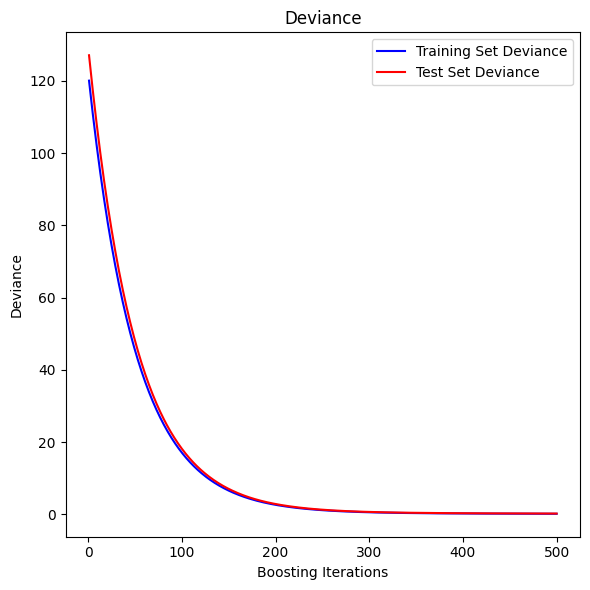

In [29]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(GB_model.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    GB_model.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)

plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

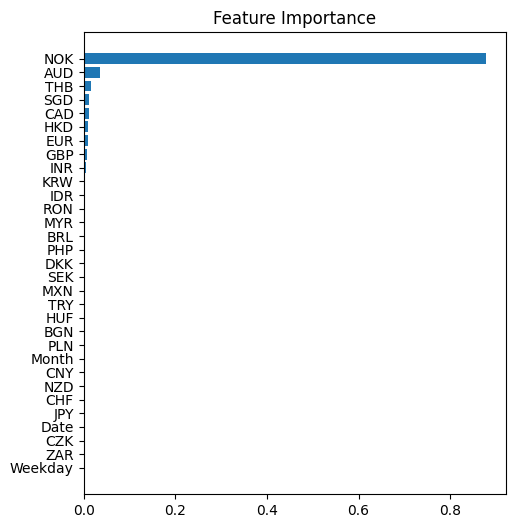

In [30]:
feature_importance = GB_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df.columns)[sorted_idx])
plt.title("Feature Importance")
plt.show()

In [31]:
from sklearn.model_selection import GridSearchCV

grid = {

    'learning_rate':[0.01,0.05,0.1],

    'n_estimators':np.arange(100,500,100),
    
    

}


gb = GradientBoostingRegressor()

gb_cv = GridSearchCV(gb, grid, cv = 4)

gb_cv.fit(X_train,y_train)

print("Best Parameters:",gb_cv.best_params_)

print("Train Score:",gb_cv.best_score_)

print("Test Score:",gb_cv.score(X_test,y_test))

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 400}
Train Score: 0.9983338290401471
Test Score: 0.9989040251767656


In [32]:
# hyperparameter tuning
# applying neural network
# some advanced model like LSTM?

In [33]:
df['INR Predictions']=newDf['Predicted']

In [34]:
df.head()

,Month,Weekday,Date,EUR,JPY,BGN,CZK,DKK,GBP,HUF,...,MYR,NZD,PHP,SGD,THB,ZAR,date,Year,Day,INR Predictions
0,9,4,27/09/23,1.0536,149.202733,1.856302,23.225133,7.077259,1.213685,370.966211,...,4.707954,0.592609,56.990319,1.371393,36.580296,19.192863,2023-09-27,2023,27,68.711250
1,9,3,26/09/23,1.0605,148.863743,1.844224,23.018388,7.032060,1.218685,366.694955,...,4.689958,0.596390,57.007072,1.367280,36.349835,18.989816,2023-09-26,2023,26,48.465623
2,9,2,25/09/23,1.0633,148.669237,1.839368,22.925797,7.013167,1.222676,367.798364,...,4.685037,0.596589,56.752563,1.365936,36.110223,18.753879,2023-09-25,2023,25,74.372341
3,9,6,22/09/23,1.0647,148.276510,1.836949,22.879684,7.002630,1.226684,363.200902,...,4.687518,0.597039,56.757772,1.364610,35.960364,18.781816,2023-09-22,2023,22,66.740678
4,9,5,21/09/23,1.0635,147.945463,1.839022,22.977903,7.009591,1.226460,364.626234,...,4.691490,0.590702,56.921486,1.368970,36.189939,18.948942,2023-09-21,2023,21,69.511660


In [35]:
df.to_excel('output.xlsx', index=False)